# All of Statistics Chapter 2 Computer Experiments

## Question 13 b)

Generate a vector $x = (x_1 , \dots , x_{10,000})$ consisting of 10,000 random standard Normals. Let $y = (y_1 , \dots , y_{10,000})$ where $y_i = e^{x_i}$. Draw a histogram of $y$ and compare it to the PDF you found in part (a).

In [29]:
# Import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math


**Solution:** First, we plot the PDF found in part (a) (which was the PDF of the random variable $Y = e^X$ with $X \sim N(0,1)$).

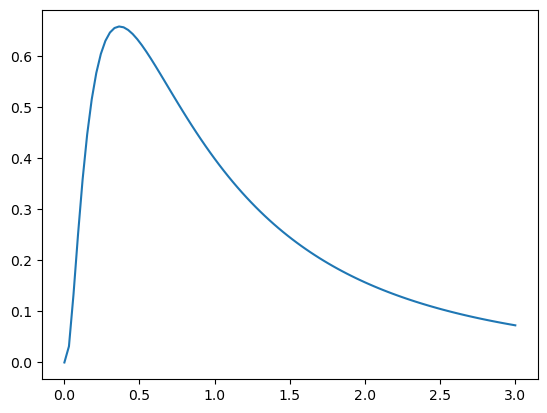

In [33]:
def f(x): #PDF of the standard normal distribution
    return 1/math.sqrt(2 * math.pi) * math.e**((-x**2)/2)

x = np.linspace(0.001, 3, 100)
y = 1/x * f(np.log(x)) #PDF of Y = e^X, where X is a standard normal r.v.

plt.plot(x,y)
plt.show()

Next, we generate our vectors of samples $x$ and $y$:

In [43]:
x = np.random.normal(0,1,10000)
y = np.array([])

for sample in x:
    y = np.append(y, [math.e**sample])

(array([  4.,  28.,  68.,  70., 120., 140., 150., 181., 197., 186., 193.,
        220., 203., 193., 187., 183., 202., 177., 186., 179., 161., 185.,
        152., 153., 150., 154., 137., 140., 118., 136., 144., 116., 135.,
        126., 100., 116., 119., 119., 107., 102., 106.,  98., 105.,  74.,
         77.,  82.,  98.,  79.,  70.,  61.,  65.,  73.,  65.,  82.,  57.,
         59.,  50.,  59.,  53.,  50.,  56.,  40.,  65.,  51.,  53.,  58.,
         45.,  46.,  58.,  36.,  45.,  45.,  43.,  33.,  35.,  28.,  44.,
         31.,  36.,  37.,  32.,  31.,  26.,  26.,  26.,  36.,  18.,  29.,
         21.,  27.,  22.,  30.,  29.,  38.,  24.,  21.,  26.,  32.,  36.]),
 array([1.00000000e-03, 3.12929293e-02, 6.15858586e-02, 9.18787879e-02,
        1.22171717e-01, 1.52464646e-01, 1.82757576e-01, 2.13050505e-01,
        2.43343434e-01, 2.73636364e-01, 3.03929293e-01, 3.34222222e-01,
        3.64515152e-01, 3.94808081e-01, 4.25101010e-01, 4.55393939e-01,
        4.85686869e-01, 5.15979798e-01, 5.46

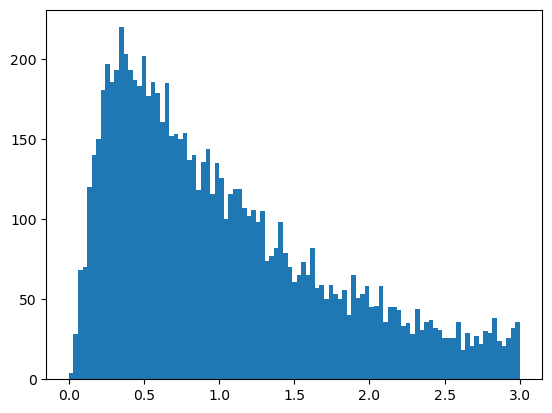

In [45]:
plt.hist(y, bins = np.linspace(0.001, 3, 100))

As we can see, the histogram of $y$ serves as a discrete approximation of the PDF of $Y$.

# Question 15

Let $X$ have a continuous, strictly increasing CDF $F$. Let $Y = F(X)$. Find the density of $Y$. This is called the probability integral transform. Now let $U \sim$ Uniform $(0,1)$ and let $X = F^{-1}(U)$. Show that $X \sim F$. Now write a program that takes Uniform $(0,1)$ random variables and generates random variables from an Exponential $(\beta)$ distribution.

**Solution:** We first find the inverse of the exponential PDF $f(x) = \beta e^{-\beta x}$, which turns out to be $f^{-1} (x) = \frac{\ln(x/\beta)}{-\beta}$. All we have to do is apply the inverse function to samples of uniform random variables.

(array([521., 269., 113.,  58.,  23.,  10.,   3.,   1.,   1.,   1.]),
 array([-1.38465074,  0.20750002,  1.79965077,  3.39180153,  4.98395228,
         6.57610304,  8.16825379,  9.76040455, 11.3525553 , 12.94470605,
        14.53685681]),
 <BarContainer object of 10 artists>)

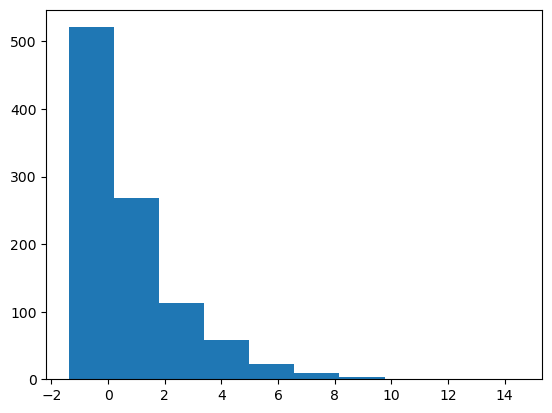

In [64]:
beta = 0.5
x = np.random.uniform(0,1,1000)

y = (np.log(x/beta))/(-beta)

plt.hist(y)

As in the previous question, we check that the histogram of the generated samples resembles the exponential PDF:

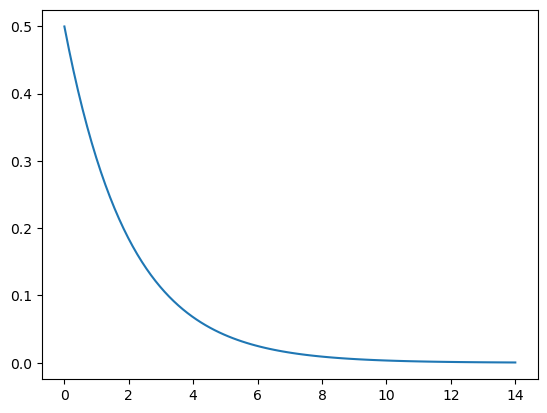

In [65]:
def exponential(x, beta): #PDF of exponential distribution with parameter beta
    return beta*math.e**(-beta * x)

x = np.linspace(0.001, 14, 100)
plt.plot(x, exponential(x, 0.5))